In [1]:
from os.path import join, exists
from os import makedirs
from glob import glob

import numpy as np
import pandas as pd

from tqdm import tqdm

from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm, colors

from nilearn import image, plotting, masking

from joblib import Memory

In [2]:
from DRN import fmri

In [3]:
DRN = fmri()

In [4]:
%matplotlib inline

---

In [5]:
# from core.env import mlagent
# from torchvision import transforms

# convert_tensor = transforms.ToTensor()

In [6]:
import torch

# device = "cuda:1" if torch.cuda.is_available() else "cpu"
device = 'cpu'
device

'cpu'

---

In [21]:
list_nn = [
    '04', '05', '06', '07', '08',
    '09', '10', '11'
]
# list_run = [ss.split('/')[-1] for ss in sorted(glob(join(DRN.dir_behav,subj,'Run?')))]

---

In [8]:
thresh = stats.norm.isf(0.5e-3) # p=1.e-3
# thresh = stats.norm.isf(0.5e-4) # p=1.e-4
# thresh = stats.norm.isf(0.5e-5) # p=1.e-5
print(thresh)

3.2905267314918945


100%|██████████| 8/8 [02:02<00:00, 15.36s/it]


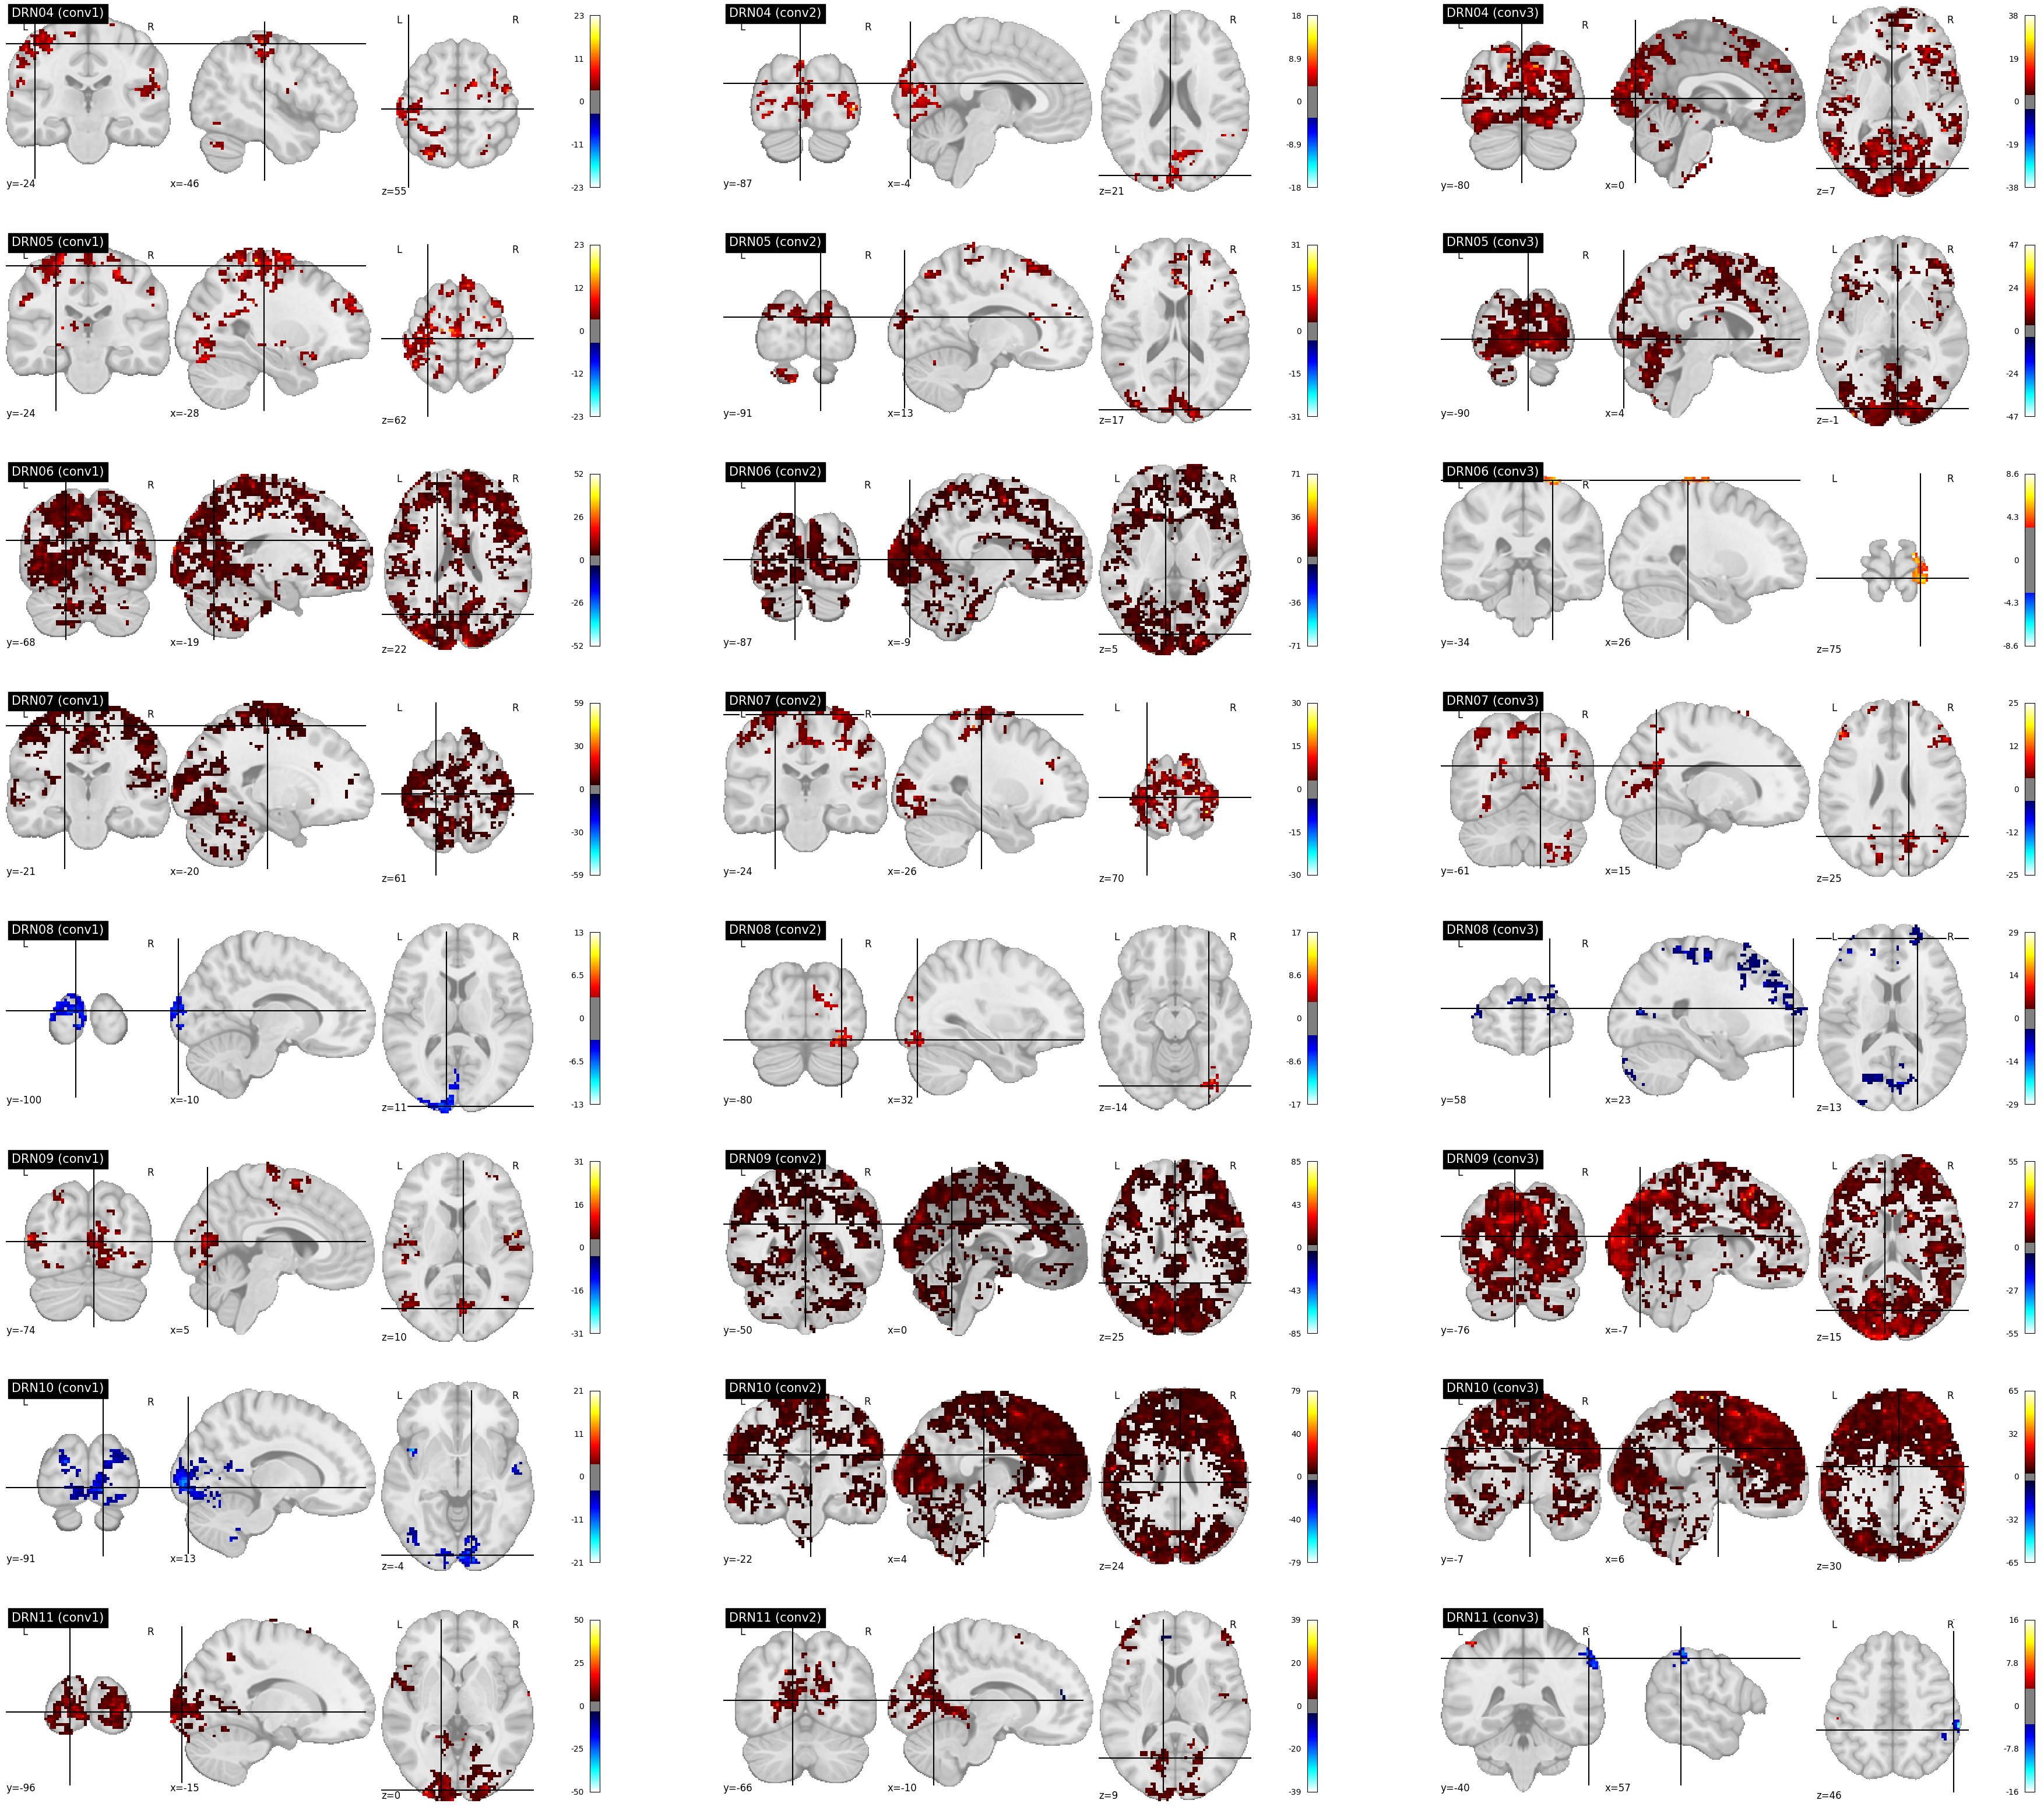

In [28]:
nrows = len(list_nn)
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*15, nrows*5))

for ss, nn in enumerate(tqdm(list_nn)):
    subj = 'DRN%s'%nn
    list_fname = glob(join(DRN.dir_fmri, 'encoding_model/%s/corr3D.3dttest++.conv?.nii'%subj))
    for ii, fname in enumerate(list_fname):
        ax = axs[ss,ii]

        img = image.load_img(fname)
        img = image.threshold_img(
            img.slicer[:,:,:,0,1],
            threshold=thresh,
            cluster_threshold=80,
            two_sided=True
        )
        
        plotting.plot_stat_map(
            img,
            threshold=thresh, symmetric_cbar=True,
            display_mode='ortho',
            title='%s (%s)'%(subj, fname.split('/')[-1].split('.')[-2]),
            axes=ax
        )

---